# Introductory 

In [1]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats
import numpy as np

#pandas profiling
import pandas_profiling

import numpy as np
#sklearn stuff
#from sklearn.pipline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.modelselections import train test split cross val score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC
# LabelEncoder can be used to normalize labels.
from sklearn.preprocessing import LabelEncoder



# helper
%matplotlib inline

In [2]:
#data import
credit = pd.read_csv('default of credit card clients.csv')
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [3]:
credit.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [4]:
#Rename Columns
credit['default']=credit['default payment next month']
credit['limit']=credit['LIMIT_BAL']
credit['sex']=credit['SEX']
credit['education']=credit['EDUCATION']
credit['marriage']=credit['MARRIAGE']
credit['age']=credit['AGE']
#edit['sex']drop unneeded columns
credit = credit.drop(['ID', 'default payment next month', "LIMIT_BAL","SEX","EDUCATION","MARRIAGE", 'AGE'], axis=1)
#drop duplicates
credit = credit.drop_duplicates()
#check for nulls
nulls=credit.isnull().sum()
nulls
#There is only 1 super high value and it's not defaulted on.
#Further analysis saw there were only 6 defaults above 600,000
credit = credit[credit.limit < 600001]

In [5]:
#Check the data types:  Note default, sex, and education are categories
credit.dtypes

PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default      object
limit         int64
sex          object
education    object
marriage      int64
age           int64
dtype: object

In [6]:
      #shift pay features for -2
credit['PAY_0'] = credit['PAY_0'].replace(-2,0)
credit['PAY_2'] = credit['PAY_2'].replace(-2,0)
credit['PAY_3'] = credit['PAY_3'].replace(-2,0)
credit['PAY_4'] = credit['PAY_4'].replace(-2,0)
credit['PAY_5'] = credit['PAY_5'].replace(-2,0)
credit['PAY_6'] = credit['PAY_6'].replace(-2,0)

#shift pay features for -1
credit['PAY_0'] = credit['PAY_0'].replace(-1,0)
credit['PAY_2'] = credit['PAY_2'].replace(-1,0)
credit['PAY_3'] = credit['PAY_3'].replace(-1,0)
credit['PAY_4'] = credit['PAY_4'].replace(-1,0)
credit['PAY_5'] = credit['PAY_5'].replace(-1,0)
credit['PAY_6'] = credit['PAY_6'].replace(-1,0)

* Average age is 35.4   

In [7]:
credit['age'].describe()

count    29886.000000
mean        35.478318
std          9.220866
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: age, dtype: float64

In [8]:
#Binning the ages into groups by decades. Age 60+ represented 1% of total customers so I have biggest group of 50+
bins = [20,29,39,49,80]

credit['age_groups'] = pd.cut(credit['age'], bins=bins, labels =['20s', '30s','40s','50+'])

In [9]:
#How many total creditors are in each age group.  
credit['age_groups'].value_counts(sort=False)

20s     9595
30s    11189
40s     6434
50+     2668
Name: age_groups, dtype: int64

In [10]:
#Mean credit limit for all customers is $166,097
credit['limit'].describe()

count     29886.000000
mean     166097.493141
std      127223.308653
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      600000.000000
Name: limit, dtype: float64

In [11]:
#I binned the credit limits. I wanted to separate the lowest limit of $10,000 in its own category.
bins = [9999,10000,25000,50000 ,100000,200000,400000,600000]
credit['limit_groups'] = pd.cut(credit['limit'],bins=bins, labels=['minimum', '(10-25]','(25-50]','(50-100]','(100-200]','(200-400]','(400-600]'])

In [12]:
#note there are a total of 493 with the $10,1000 minimum
credit['limit_groups'].value_counts(sort=False)

minimum       493
(10-25]      1977
(25-50]      5203
(50-100]     4817
(100-200]    7867
(200-400]    7805
(400-600]    1724
Name: limit_groups, dtype: int64

In [13]:
#Look to see if they have limits and ages have been binned.
credit.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,PAY_AMT5,PAY_AMT6,default,limit,sex,education,marriage,age,age_groups,limit_groups
0,2,2,0,0,0,0,3913,3102,689,0,...,0,0,default,20000,female,university,1,24,20s,(10-25]
1,0,2,0,0,0,2,2682,1725,2682,3272,...,0,2000,default,120000,female,university,2,26,20s,(100-200]
2,0,0,0,0,0,0,29239,14027,13559,14331,...,1000,5000,not default,90000,female,university,2,34,30s,(50-100]
3,0,0,0,0,0,0,46990,48233,49291,28314,...,1069,1000,not default,50000,female,university,1,37,30s,(25-50]
4,0,0,0,0,0,0,8617,5670,35835,20940,...,689,679,not default,50000,male,university,1,57,50+,(25-50]


# Data Seperated into Bad_Credit and Good_Credit
<p> Determined by whether or not they defaulted the next month.

In [14]:
#divide into 2 groups.  Those that defaulted and those that did not
bad_credit = credit[credit.default == 'default']
good_credit = credit[credit.default == 'not default']

In [15]:
# Table to show the number of defaulter vs non-defaulters in each credit limit group
b=bad_credit['limit_groups'].value_counts(sort=False)
#b.rename(columns = {'limit_groups':"default"})
g=good_credit['limit_groups'].value_counts(sort=False)
pd.concat([b,g],axis=1, keys=['default','non_default'])


,default,non_default
minimum,197,296
(10-25],697,1280
(25-50],1545,3658
(50-100],1244,3573
(100-200],1534,6333
(200-400],1197,6608
(400-600],210,1514


In [16]:
b.describe()

count       7.000000
mean      946.285714
std       580.380253
min       197.000000
25%       453.500000
50%      1197.000000
75%      1389.000000
max      1545.000000
Name: limit_groups, dtype: float64

In [17]:
#Table to show each age group in credit limit groups
b1=bad_credit.groupby(by=['age_groups','limit_groups']).size()
g1=good_credit.groupby(by=['age_groups','limit_groups']).size()
pd.concat([b1,g1],axis=1, keys=['default','non_default'])

default  non_default
age_groups limit_groups                      
20s        minimum            93          159
           (10-25]           302          633
           (25-50]           659         1562
           (50-100]          476         1492
           (100-200]         435         2013
           (200-400]         214         1357
           (400-600]          16          184
30s        minimum            35           66
           (10-25]           169          286
           (25-50]           405          923
           (50-100]          402         1105
           (100-200]         619         2571
           (200-400]         550         3217
           (400-600]          93          748
40s        minimum            50           46
           (10-25]           156          225
           (25-50]           305          778
           (50-100]          258          662
           (100-200]         334         1305
           (200-400]         310         1525
           (400-600]          65          415
50+        minimum            19           25
           (10-25]            70          136
           (25-50]           176          395
           (50-100]          108          314
           (100-200]         146          444
           (200-400]         123          509
           (400-600]          36          167

In [18]:
#There are 6624 that defaulted the next month and 23262 that did not
bad_credit['default'].describe() ,good_credit['default'].describe()

(count        6624
 unique          1
 top       default
 freq         6624
 Name: default, dtype: object,
 count           23262
 unique              1
 top       not default
 freq            23262
 Name: default, dtype: object)

In [19]:
print('The average default rate is ', 6624/(6624+23262))

The average default rate is  0.221642240513953


In [20]:
#What are the statistical differences between those that defaulted 
#and those that did not.
b2=bad_credit['limit'].describe()
g2=good_credit['limit'].describe()
pd.concat([b2,g2],axis=1, keys=['default','non_default'])

,default,non_default
count,6624.000000,23262.000000
mean,129483.345411,176523.600722
std,114092.543332,128833.990435
min,10000.000000,10000.000000
25%,50000.000000,60000.000000
50%,90000.000000,150000.000000
75%,200000.000000,250000.000000
max,600000.000000,600000.000000


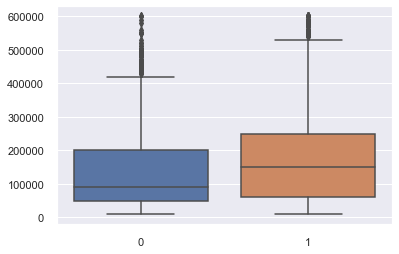

In [21]:
#Defaulters have lower credit limits
sns.set(font_scale=1)
sns.boxplot(data=[bad_credit['limit'],good_credit['limit']])
plt.show()

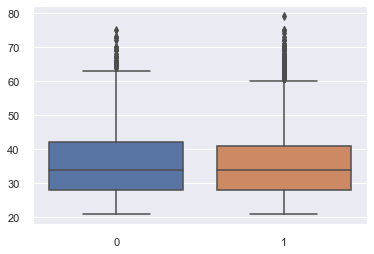

In [22]:
#Age does not seem to matter in default vs non-default
sns.set(font_scale=1)
sns.boxplot(data=[bad_credit['age'],good_credit['age']])
plt.show()

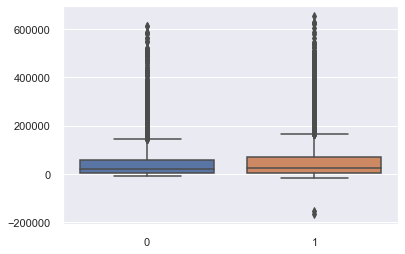

In [23]:
#Seems to be even
sns.set(font_scale=1)
sns.boxplot(data=[bad_credit['BILL_AMT1'],good_credit['BILL_AMT1']])
plt.show()

<b> Look at Education only with those that default</b>

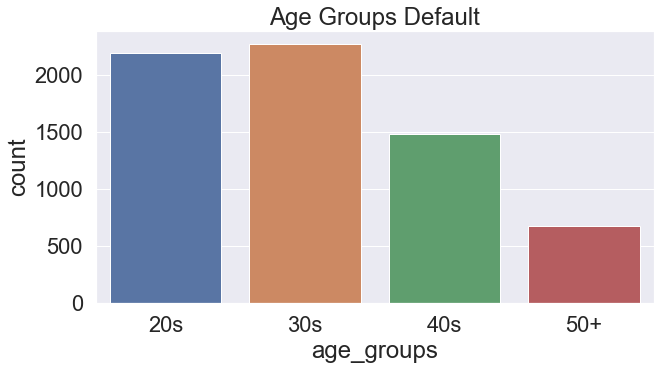

In [24]:
sns.set(font_scale=2)
#Graphical showing age groups of defaulters
#20-39 are the largest group
plt.figure(figsize=(10,5))
sns.countplot('age_groups', data=bad_credit)
plt.title('Age Groups Default')
plt.show()

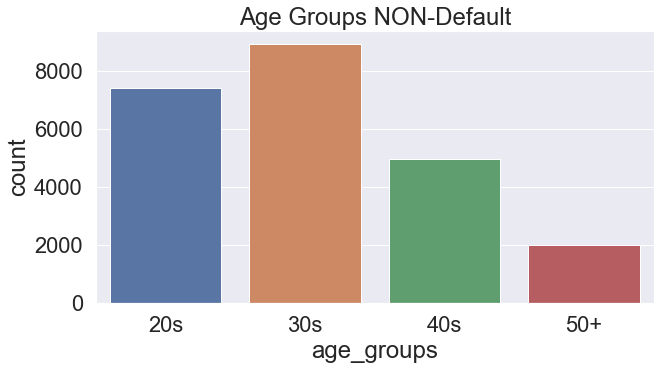

In [25]:
sns.set(font_scale=2)
#Graphical showing age groups of defaulters
#20-39 are the largest group
plt.figure(figsize=(10,5))
sns.countplot('age_groups', data=good_credit)
plt.title('Age Groups NON-Default')
plt.show()

<p> The 30's seems to be the largest group.
    
    

In [26]:
#count of defaulters
bad_credit['age_groups'].value_counts(sort=False)

20s    2195
30s    2273
40s    1478
50+     678
Name: age_groups, dtype: int64

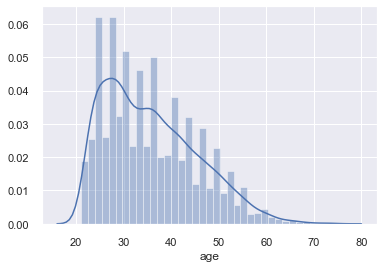

In [27]:
#Definately skewed right
sns.set(font_scale=1)
sns.distplot(bad_credit['age'])
plt.show()

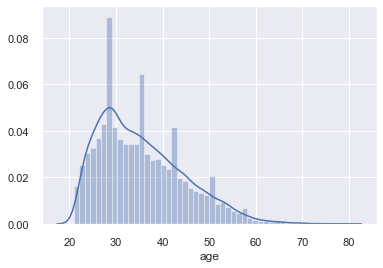

In [28]:
#Definately skewed right
sns.set(font_scale=1)
sns.distplot(good_credit['age'])
plt.show()

* kde plots, 

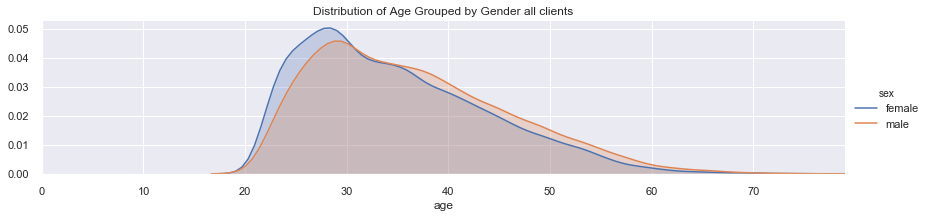

In [29]:

fig = sns.FacetGrid(credit, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = credit['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
fig.set(title='Distribution of Age Grouped by Gender all clients')
plt.show()

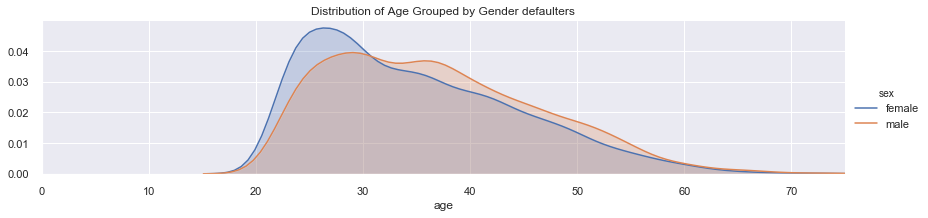

In [30]:
 fig = sns.FacetGrid(bad_credit, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = bad_credit['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
fig.set(title='Distribution of Age Grouped by Gender defaulters')
plt.show()

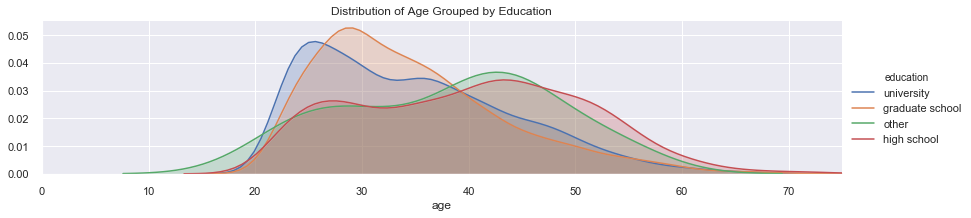

In [31]:
fig = sns.FacetGrid(bad_credit, hue='education', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = bad_credit['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
fig.set(title='Distribution of Age Grouped by Education')

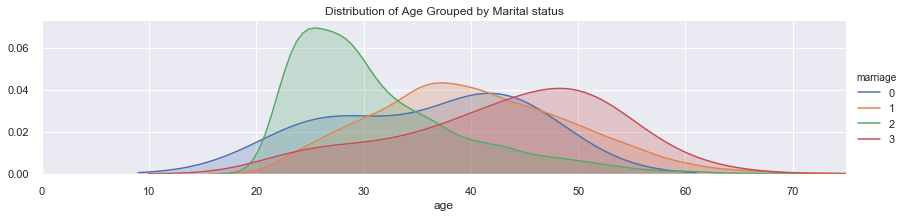

In [32]:
fig = sns.FacetGrid(bad_credit, hue='marriage', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = bad_credit['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
fig.set(title='Distribution of Age Grouped by Marital status')
plt.show()

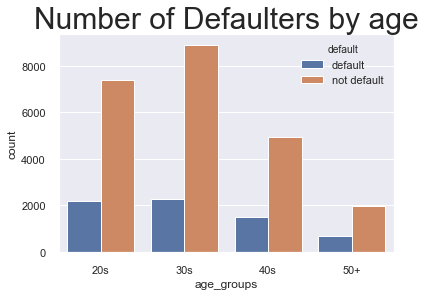

In [33]:
#Use seaborn to look at age of default/non-defaultsns.factorplot('age_groups', data=credit, hue='default', kind='count', aspect=1.75)
sns.set(font_scale=1)
sns.countplot('age_groups', data=credit, hue='default').set_title('Number of Defaulters by age', fontsize=30)
plt.show()

In [34]:
credit.pivot_table('limit','sex','age_groups', aggfunc=np.mean, margins=True)

age_groups,20s,30s,40s,50+,All
sex,,,,,
female,130893.280632,200966.576332,180200.326619,158129.445235,168842.799357
male,109691.131498,187499.450187,177146.260870,171719.492868,161912.634513
All,123667.535175,195493.788542,178890.220703,164557.721139,166097.493141


In [35]:
##interesting.  Females tend to have higher credit limits in their 20's and 30's.
bad_credit.pivot_table('limit','sex','age_groups', aggfunc=np.mean, margins=True)

age_groups,20s,30s,40s,50+,All
sex,,,,,
female,102686.567164,162804.578904,141314.791403,126716.417910,132539.936102
male,77576.142132,143190.476190,141423.114993,149387.755102,125480.362622
All,93671.981777,153743.950726,141365.142084,138185.840708,129483.345411


In [36]:
good_credit.pivot_table('limit','sex','age_groups', aggfunc=np.mean, margins=True)

age_groups,20s,30s,40s,50+,All
sex,,,,,
female,138962.993087,209579.258166,190869.233437,167955.182073,178384.017913
male,119887.187752,200803.545896,188985.045827,180054.406964,173559.915283
All,132564.864865,206137.281292,190081.113801,173542.713568,176523.600722


In [37]:
bad_credit.pivot_table('limit','education','age_groups', aggfunc=np.mean, margins=True)

age_groups,20s,30s,40s,50+,All
education,,,,,
graduate school,112926.829268,199248.484848,226768.802228,237364.864865,177244.948250
high school,76053.639847,112065.573770,102929.552239,96096.654275,98025.610348
other,110000.000000,225000.000000,125714.285714,57500.000000,131212.121212
university,86368.078176,131530.343008,120042.674253,126381.322957,112024.060150
All,93671.981777,153743.950726,141365.142084,138185.840708,129483.345411


In [38]:
bad_credit.pivot_table('limit','marriage','age_groups', aggfunc=np.mean, margins=True)

age_groups,20s,30s,40s,50+,All
marriage,,,,,
0,125000.000000,NaN,120000.000000,NaN,122000.000000
1,97080.103359,149644.039735,147317.757009,148063.909774,142239.599625
2,92951.002227,159324.452902,131637.951482,108083.333333,118693.133613
3,85000.000000,88571.428571,62058.823529,75000.000000,73214.285714
All,93671.981777,153743.950726,141365.142084,138185.840708,129483.345411


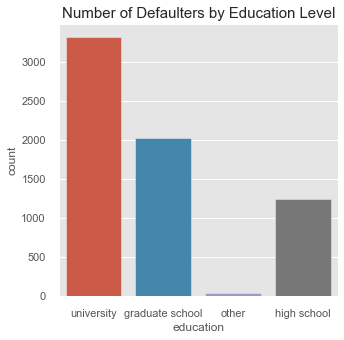

In [39]:
#Graphical showing education of defaulters
sns.set(font_scale=1)
plt.style.use('ggplot')
plt.figure(figsize=(5,5))
sns.countplot('education', data=bad_credit).set_title('Number of Defaulters by Education Level', fontsize=15)

plt.show()

In [40]:
#Grouped by education and then age groups.  University has a lot
bad_credit.groupby(['education', 'age_groups']).size()

education        age_groups
graduate school  20s            697
                 30s            825
                 40s            359
                 50+            148
high school      20s            261
                 30s            305
                 40s            402
                 50+            269
other            20s              9
                 30s              6
                 40s             14
                 50+              4
university       20s           1228
                 30s           1137
                 40s            703
                 50+            257
dtype: int64

In [41]:
# Percent of each age group that defaults with that education
c = bad_credit.groupby(['education', 'age_groups'])['age_groups'].size().rename("count")
c / c.groupby(level=0).sum()*100


education        age_groups
graduate school  20s           34.351897
                 30s           40.660424
                 40s           17.693445
                 50+            7.294234
high school      20s           21.099434
                 30s           24.656427
                 40s           32.497979
                 50+           21.746160
other            20s           27.272727
                 30s           18.181818
                 40s           42.424242
                 50+           12.121212
university       20s           36.932331
                 30s           34.195489
                 40s           21.142857
                 50+            7.729323
Name: count, dtype: float64

* The top 3 groups by amount of money owed is 
    *1) University 30's 67,581,310
    *2) University 20's 53,591,249
    *3) Graduate   30's 38,882,706
    

In [42]:
#The bill amount that is getting default.
bad_credit.groupby(['education', 'age_groups'])['BILL_AMT1'].agg('sum')

education        age_groups
graduate school  20s           25972994
                 30s           38882706
                 40s           21650440
                 50+            8863839
high school      20s            8982629
                 30s           14966306
                 40s           17484977
                 50+           10733643
other            20s             547307
                 30s            1086713
                 40s            1246522
                 50+             223430
university       20s           53591249
                 30s           67581310
                 40s           35908308
                 50+           13170762
Name: BILL_AMT1, dtype: int64

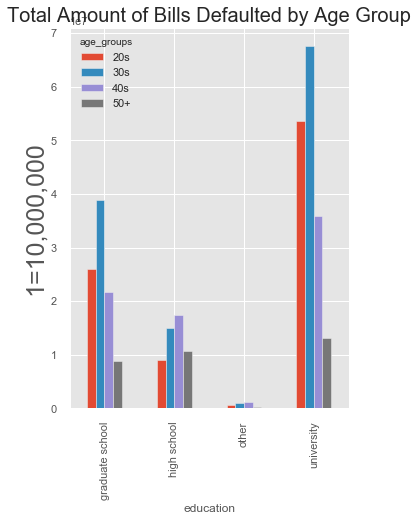

In [43]:
bad_credit.groupby(['education', 'age_groups'])['BILL_AMT1'].agg('sum').unstack().plot.bar(figsize=(5, 7))
plt.title('Total Amount of Bills Defaulted by Age Group',fontsize=20)
plt.ylabel('1=10,000,000', fontsize=25)
plt.show()

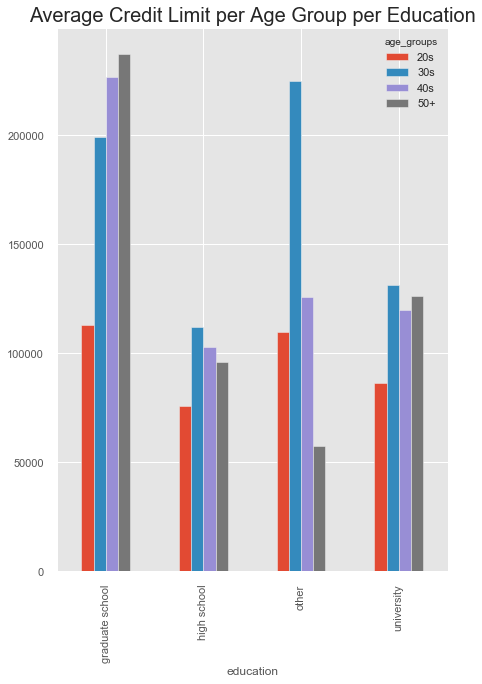

In [44]:
bad_credit.groupby(['education', 'age_groups'])['limit'].agg('mean').unstack().plot.bar(figsize=(7,10))
plt.title("Average Credit Limit per Age Group per Education", fontsize=20)
plt.show()

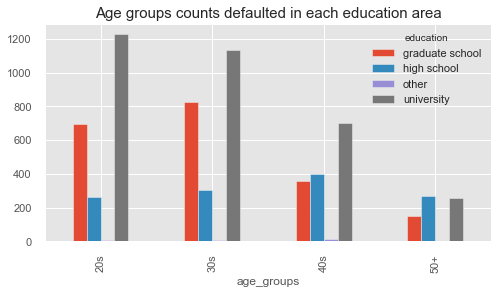

In [45]:
sns.set(font_scale=1)
plt.style.use('ggplot')

bad_credit.groupby(['age_groups', 'education']).count()['BILL_AMT1'].unstack().plot.bar(figsize=(8,4))
plt.title("Age groups counts defaulted in each education area", fontsize=15)
plt.show()

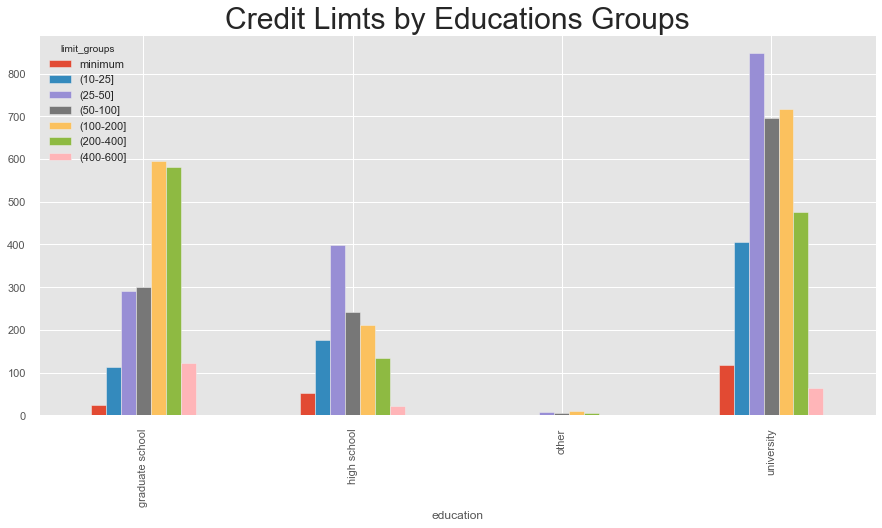

In [46]:
bad_credit.groupby(by=['education', 'limit_groups']).size().unstack().plot.bar(figsize=(15, 7))
plt.title("Credit Limts by Educations Groups", fontsize=30)
plt.show()

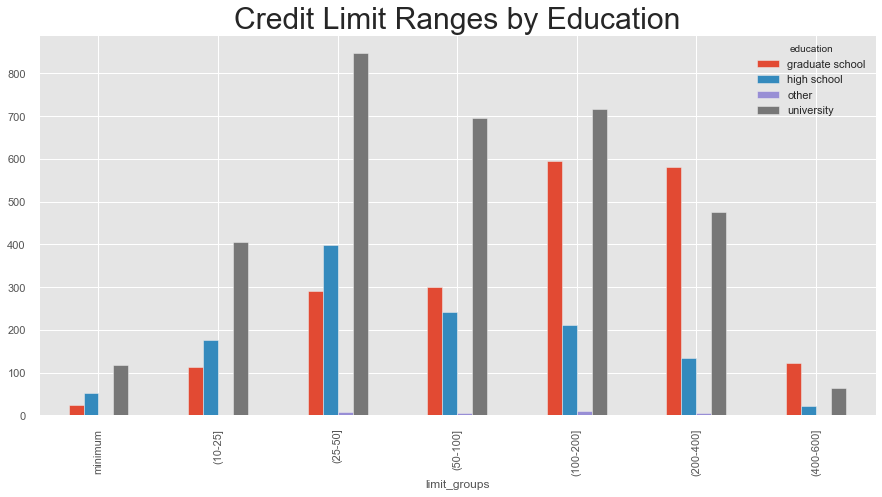

In [47]:
bad_credit.groupby(by=[ 'limit_groups','education']).size().unstack().plot.bar(figsize=(15, 7))
plt.title("Credit Limit Ranges by Education", fontsize=30)
plt.show()

In [48]:
grouped2 = bad_credit.groupby(by=['age_groups'])['BILL_AMT1'].agg('sum')

In [49]:
grouped1 = bad_credit["age_groups"].value_counts()

In [50]:
grouped3 = bad_credit.groupby(by=['age_groups'])['limit'].agg('mean')

In [51]:
together = pd.concat([grouped2,grouped1, grouped3],axis=1)
print(together)

     BILL_AMT1  age_groups          limit
20s   89094179        2195   93671.981777
30s  122517035        2273  153743.950726
40s   76290247        1478  141365.142084
50+   32991674         678  138185.840708


In [52]:
together['average']=together['BILL_AMT1']/together['age_groups']
together['amount above average limit'] = together['limit']-together['average']
together

,BILL_AMT1,age_groups,limit,average,amount above average limit
20s,89094179,2195,93671.981777,40589.603189,53082.378588
30s,122517035,2273,153743.950726,53901.027277,99842.923449
40s,76290247,1478,141365.142084,51617.217185,89747.924899
50+,32991674,678,138185.840708,48660.286136,89525.554572


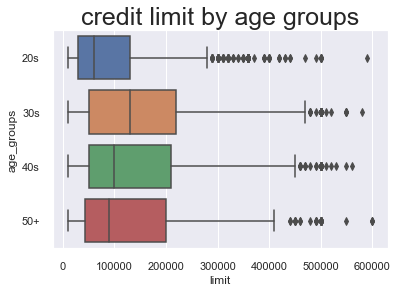

In [53]:
sns.set(font_scale=1)
sns.boxplot(bad_credit['limit'], bad_credit['age_groups'])
plt.title("credit limit by age groups", fontsize=25)
plt.show()

In [54]:
bad_credit.groupby(by=['age_groups','limit_groups']).size()

age_groups  limit_groups
20s         minimum          93
            (10-25]         302
            (25-50]         659
            (50-100]        476
            (100-200]       435
            (200-400]       214
            (400-600]        16
30s         minimum          35
            (10-25]         169
            (25-50]         405
            (50-100]        402
            (100-200]       619
            (200-400]       550
            (400-600]        93
40s         minimum          50
            (10-25]         156
            (25-50]         305
            (50-100]        258
            (100-200]       334
            (200-400]       310
            (400-600]        65
50+         minimum          19
            (10-25]          70
            (25-50]         176
            (50-100]        108
            (100-200]       146
            (200-400]       123
            (400-600]        36
dtype: int64

In [55]:
#I don't know if this tells me anything?  
bad_credit.groupby(by=['education','PAY_0']).size()

education        PAY_0
graduate school  0        1057
                 1         415
                 2         487
                 3          56
                 4           8
                 5           1
                 7           1
                 8           4
high school      0         557
                 1         237
                 2         382
                 3          43
                 4          13
                 5           3
                 7           1
                 8           1
other            0          26
                 2           7
university       0        1562
                 1         596
                 2         965
                 3         145
                 4          31
                 5           9
                 6           6
                 7           5
                 8           6
dtype: int64

* Things I've learned
* University has the highest number of defaulters. They rank 3 in the top 4
* places in Amount defaulted on and number of defaulters.  
* Typically university grads even have lower credit limits.  

# Marital Status?


In [56]:
bad_credit.groupby(by=['marriage']).size()
##Do I keep the others in here?  There are only 5.

marriage
0       5
1    3197
2    3338
3      84
dtype: int64

In [57]:
bad_credit.groupby(by=['age_groups','marriage']).size()

age_groups  marriage
20s         0              2
            1            387
            2           1796
            3             10
30s         0              0
            1           1208
            2           1051
            3             14
40s         0              3
            1           1070
            2            371
            3             34
50+         0              0
            1            532
            2            120
            3             26
dtype: int64

In [58]:
#I decided to drop those 5
bad_credit = bad_credit[bad_credit.marriage != 0]

In [59]:
#Here is what it looks like with those 5 removed.
bad_credit.groupby(by=['age_groups','marriage']).size()

age_groups  marriage
20s         1            387
            2           1796
            3             10
30s         1           1208
            2           1051
            3             14
40s         1           1070
            2            371
            3             34
50+         1            532
            2            120
            3             26
dtype: int64

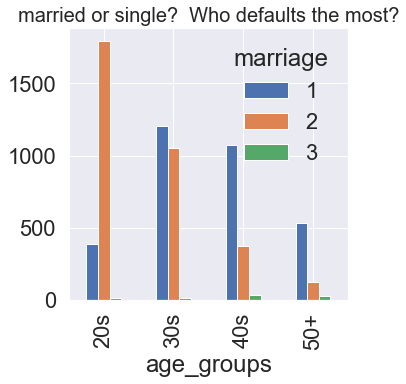

In [83]:
sns.set(font_scale=2)
bad_credit.groupby(by=['age_groups','marriage']).size().unstack(fill_value=0).plot.bar(figsize=(5,5))
plt.title('married or single?  Who defaults the most?', fontsize=20)
plt.show()

* Let's look deeper into these 20-29?

In [61]:
credit20s = bad_credit[bad_credit.age <30]
credit30s = bad_credit[bad_credit['age'].between(30,39)]
credit30s.describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,limit,marriage,age
count,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,...,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000
mean,0.866696,0.751870,0.667840,0.603608,0.531016,0.521777,53901.027277,52389.885614,49655.516938,46716.628245,...,42446.420150,3779.454905,3890.732072,4289.986802,3708.461505,3701.105587,4268.633524,153743.950726,1.474703,34.326881
std,1.050362,1.086095,1.068149,1.099746,1.063574,1.049642,81002.135188,78407.795772,74475.335709,69653.068293,...,63588.464763,10108.696451,13007.312752,18917.120027,13896.913920,13691.244173,16872.359774,118488.572463,0.511658,2.866309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6029.000000,-17710.000000,-61506.000000,-50616.000000,...,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,1.000000,30.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2400.000000,1863.000000,1786.000000,1261.000000,...,780.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000.000000,1.000000,32.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21839.000000,21658.000000,20645.000000,19860.000000,...,19234.000000,1700.000000,1650.000000,1250.000000,1047.000000,1100.000000,1010.000000,130000.000000,1.000000,34.000000
75%,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,70011.000000,67864.000000,64930.000000,60353.000000,...,55392.000000,4000.000000,4000.000000,3341.000000,3115.000000,3410.000000,3120.000000,220000.000000,2.000000,37.000000
max,8.000000,7.000000,8.000000,7.000000,7.000000,8.000000,610723.000000,581775.000000,572677.000000,548020.000000,...,498316.000000,300000.000000,344467.000000,508229.000000,432130.000000,330982.000000,345293.000000,580000.000000,3.000000,39.000000


In [62]:
credit20s['age'].value_counts(sort=False)

22    169
24    299
26    252
28    286
21     14
23    247
25    302
27    312
29    312
Name: age, dtype: int64

In [63]:
#this is the largest group of
credit20s.groupby(by=['age','limit_groups']).size()

age  limit_groups
21   minimum          6
     (10-25]          4
     (25-50]          4
     (50-100]         0
     (100-200]        0
                     ..
29   (25-50]         63
     (50-100]        61
     (100-200]       98
     (200-400]       67
     (400-600]        5
Length: 63, dtype: int64

In [64]:
credit30s.groupby(by=['age','limit_groups']).size()

age  limit_groups
30   minimum          8
     (10-25]         20
     (25-50]         43
     (50-100]        58
     (100-200]       76
                     ..
39   (25-50]         39
     (50-100]        33
     (100-200]       51
     (200-400]       47
     (400-600]       10
Length: 70, dtype: int64

In [65]:
#Single 24 year olds--this is the same time when the min limit starts to raise
credit20s.groupby(by=['age','marriage']).size()

age  marriage
21   1             2
     2            12
22   1            15
     2           151
     3             3
23   1            33
     2           214
24   1            39
     2           260
25   1            46
     2           253
     3             3
26   1            43
     2           208
     3             1
27   1            74
     2           238
28   1            69
     2           215
     3             2
29   1            66
     2           245
     3             1
dtype: int64

In [66]:
credit30s.groupby(by=['age','marriage']).size()

age  marriage
30   1           101
     2           170
     3             2
31   1            82
     2           146
     3             1
32   1           101
     2           124
33   1            97
     2           117
     3             1
34   1           120
     2           109
     3             2
35   1           144
     2            78
     3             3
36   1           140
     2           113
     3             1
37   1           152
     2            75
     3             2
38   1           133
     2            59
     3             1
39   1           138
     2            60
     3             1
dtype: int64

In [67]:
credit20s.groupby(by=['age','education']).size()

age  education      
21   graduate school      1
     high school          1
     university          12
22   graduate school     36
     high school         26
     other                2
     university         105
23   graduate school     61
     high school         33
     other                1
     university         152
24   graduate school     85
     high school         34
     university         180
25   graduate school     83
     high school         24
     other                2
     university         193
26   graduate school     69
     high school         40
     other                1
     university         142
27   graduate school    116
     high school         34
     university         162
28   graduate school    111
     high school         39
     other                1
     university         135
29   graduate school    135
     high school         28
     other                2
     university         147
dtype: int64

In [68]:
credit20s.groupby(by=['education']).size()

education
graduate school     697
high school         259
other                 9
university         1228
dtype: int64

In [69]:
credit20s.groupby(by=['sex']).size()

sex
female    1407
male       786
dtype: int64

In [70]:
bad_credit.groupby(by=['sex']).size()

sex
female    3753
male      2866
dtype: int64

In [71]:
good_credit.groupby(by=['sex']).size()

sex
female    14291
male       8971
dtype: int64

In [72]:
credit.groupby(by=['sex']).size()

sex
female    18047
male      11839
dtype: int64

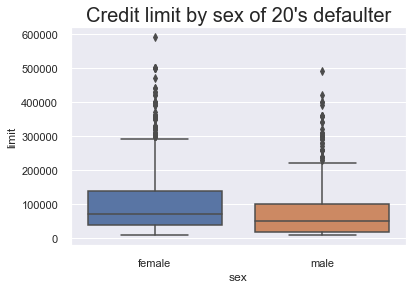

In [78]:
sns.set(font_scale=1)
sns.boxplot(credit20s['sex'], credit20s['limit'])

plt.title("Credit limit by sex of 20's defaulter", fontsize=20)

plt.show()

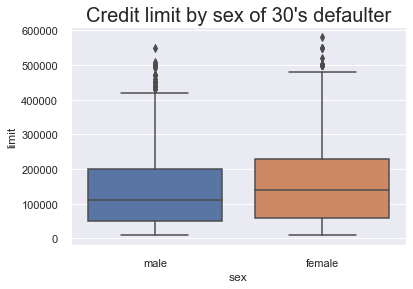

In [79]:
sns.set(font_scale=1)
sns.boxplot(credit30s['sex'], credit30s['limit'])
plt.title("Credit limit by sex of 30's defaulter", fontsize=20)
plt.show()

In [82]:
bb=bad_credit.groupby(by=['age_groups','sex'])['sex'].count()
bb


age_groups  sex   
20s         female    1407
            male       786
30s         female    1223
            male      1050
40s         female     788
            male       687
50+         female     335
            male       343
Name: sex, dtype: int64

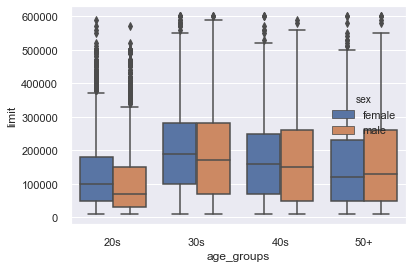

In [75]:
sns.boxplot(credit['age_groups'],credit['limit'], hue='sex' ,data=credit)
plt.show()

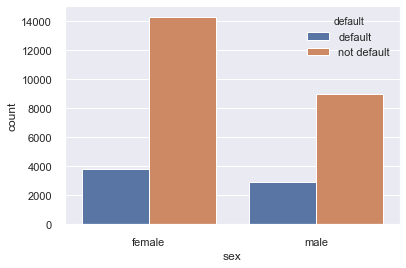

In [76]:
sns.countplot('sex', hue='default',data=credit)
plt.show()